# Homework 5 - Ishaan Sathaye

## Data Context

Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain (“angina”) during exercise. The information collected includes:

- age : Age of the patient

- sex : Sex of the patient

- cp : Chest Pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholesteral in mg/dl fetched via BMI sensor

- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- thalach : maximum heart rate achieved during exercise

- output : the doctor’s diagnosis of whether the patient is at risk for a heart attack
    - 0 = not at risk of heart attack
    - 1 = at risk of heart attack

A copy of the dataset that has been cleaned, dummified, and standardized for you is found at https://www.dropbox.com/s/jpnyx41u7wpa41m/heart_attack_clean.csv?dl=1


## Section A

1. Provide the gradient function derivation for SVC.
    - $l(w, c) = \sum_{i=1}^{n} max(0, 1 - y_i*\hat{y_i}) + \lambda||w||^2_2$
    - Expand:
        - $l(w, c) = \sum_{i=1}^{n} max(0, 1 - y_i*(w^Tx_i + c)) + \lambda||w||^2_2$
    - Derivative with respect to w:
        - $\nabla_w l(w, c) = -y_i*x_i$ if $y_i*(w^Tx_i + c) < 1$
        - $\nabla_w l(w, c) = 0$ if $y_i*(w^Tx_i + c) >= 1$
    - Derivative with respect to c:
        - $\nabla_c l(w, c) = -y_i$ if $y_i*(w^Tx_i + c) < 1$
        - $\nabla_c l(w, c) = 0$ if $y_i*(w^Tx_i + c) >= 1$
    - Regularization term:
        - $\nabla_w \lambda||w||^2_2 = 2\lambda w$
        - $\nabla_c \lambda||w||^2_2 = 0$
    - $\nabla_w l(w, c) = \sum_{i=1}^{n} -y_i*x_i + 2\lambda w$ for $iy_i*(w^Tx_i + c) < 1$
    - $\nabla_c l(w, c) = \sum_{i=1}^{n} -y_i$ for $iy_i*(w^Tx_i + c) < 1$

2. Provide the derivation of the beta equations for LDA.
    - $p(x) = p_1*\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu_1)^2}{2\sigma^2}}*(1-p_1)*\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu_0)^2}{2\sigma^2}}$
    - Log-Likelihood Ratio:
        - $log(\frac{p(x|y=1)}{p(x|y=0)}) = log(\frac{p_1}{1-p_1}) - \frac{(x-\mu_1)^2}{2\sigma^2} + \frac{(x-\mu_0)^2}{2\sigma^2}$
    - $z_i = log(\frac{p_1}{1-p_1}) - \frac{(\mu_0^2-\mu_1^2)}{2\sigma^2} + \frac{(\mu_0-\mu_1)}{2\sigma^2}*x_i$
    - $z_i = \beta_0 + \beta_1*x_i$
    - Convert to multivariate form:
        - $z = \beta^Tx$
    - $\hat{\beta} = \hat{\Sigma}^{-1}(\bar{X_1} - \bar{X_0})$
    - $\hat{\beta_0} = log(\frac{p_1}{1-p_1}) - \frac{1}{2}(\bar{X_1}^T\hat{\Sigma}^{-1}\bar{X_1} - \bar{X_0}^T\hat{\Sigma}^{-1}\bar{X_0})$

- Consider the small example data:
    - cholesterol: [192, 233, 236, 237, 250, 294, 354, 410]
    - at-risk category: [0, 0, 1, 1, 0, 1, 1, 1]

3. All three models result in a decision boundary, $X\beta = 0$. Find the $\beta$ values from the data above for all three models. How similar were the results?

In [9]:
import numpy as np
import pandas as pd

# Data
cholesterol = np.array([192, 233, 236, 237, 250, 294, 354, 410])
at_risk = np.array([0, 0, 1, 1, 0, 1, 1, 1])
X = cholesterol.reshape(-1, 1)
y = at_risk

# Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
beta_0 = log_reg.intercept_[0]
beta_1 = log_reg.coef_[0][0]
print(f"Logistic regression: beta_0 = {beta_0}, beta_1 = {beta_1}")

# SVC
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X, y)
beta_0 = svm.intercept_[0]
beta_1 = svm.coef_[0][0]
print(f"SVC: beta_0 = {beta_0}, beta_1 = {beta_1}")

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
beta_0 = lda.intercept_[0]
beta_1 = lda.coef_[0][0]
print(f"LDA: beta_0 = {beta_0}, beta_1 = {beta_1}")

Logistic regression: beta_0 = -12.340540456260143, beta_1 = 0.0515573330459061
SVC: beta_0 = -4.7647058823473305, beta_1 = 0.019607843137204345
LDA: beta_0 = -4.7274599147154746, beta_1 = 0.019722460611752507


SVC and LDA were the most similar results with their $\beta$ values being [-4.76, 0.0196] and [-4.72, 0.0197] respectively. Logistic Regression was the most different with a $\beta$ value of [-12.3, 0.05].

4. For the three classifiers, find the actual decision boundary; i.e., the cholesterol value for which $X\beta = 0$. Give some intuition for why certain models have higher cutoffs than others.

In [10]:
# Logistic regression
beta_0 = log_reg.intercept_[0]
beta_1 = log_reg.coef_[0][0]
lr_cutoff = -beta_0 / beta_1

# SVC
beta_0 = svm.intercept_[0]
beta_1 = svm.coef_[0][0]
svm_cutoff = -beta_0 / beta_1

# LDA
beta_0 = lda.intercept_[0]
beta_1 = lda.coef_[0][0]
lda_cutoff = -beta_0 / beta_1

print(f"Logistic regression cutoff: {lr_cutoff}")
print(f"SVC cutoff: {svm_cutoff}")
print(f"LDA cutoff: {lda_cutoff}")

Logistic regression cutoff: 239.35567895399586
SVC cutoff: 243.0000000003404
LDA cutoff: 239.6992955279833


The decision boundary for Logistic Regression is 239.35, for SVC it is 243.0, and for LDA it is 239.699. Certain models have higher cutoffs than others because they are more sensitive to the data and so the decision boundary is more influenced by the data. For LR, it is sensitive to all data leading to that cutoff. SVC focuses on maximizing the margin between the 2 at risk classes which leads to a higher cutoff. LDA is was closer to LR because it took into consideration overall distribution of data rather than subset of data.

## Section B

1. Write code to implement gradient descent for the SVC estimation for the Heart Attack Risk dataset.

In [41]:
def gradient_descent(X, y, lam, eta, epochs):
    n, m = X.shape
    w = np.zeros(m)
    c = 0
    for _ in range(epochs):
        # Compute gradients
        grad_w = -2 * X.T.dot(y - X.dot(w) - c) + 2 * lam * w
        grad_c = -2 * np.sum(y - X.dot(w) - c)
        # Update parameters
        w -= eta * grad_w
        c -= eta * grad_c
    return np.append(c, w)

2. Write code to implement LDA for the Heart Attach Risk dataset.

In [35]:
def lda(X, y):
    n, m = X.shape
    mu = np.mean(X, axis=0)
    X0 = X[y == 0]
    X1 = X[y == 1]
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)
    S0 = (X0 - mu0).T.dot(X0 - mu0)
    S1 = (X1 - mu1).T.dot(X1 - mu1)
    S = S0 + S1
    w = np.linalg.inv(S).dot(mu1 - mu0)
    c = w.dot((mu0 + mu1) / 2)
    return np.append(c, w)

def lda_predict(X, c, w):
    return np.where(X.dot(w) + c > 0, 1, 0)

3. Separate the Heart Attack Risk dataset in half into one training and one test set. Use all three of your model implementations (SCV, LDA, and Logistic Regression) to fit on the training data and predict on the test data.

In [37]:
# Logistic regression

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def log_reg(X, y, lam, eta, epochs):
    n, m = X.shape
    w = np.zeros(m)
    c = 0
    for _ in range(epochs):
        # Compute gradients
        grad_w = -2 * X.T.dot(y - sigmoid(X.dot(w) + c)) + 2 * lam * w
        grad_c = -2 * np.sum(y - sigmoid(X.dot(w) + c))
        # Update parameters
        w -= eta * grad_w
        c -= eta * grad_c
    return np.append(c, w)

def log_reg_predict(X, c, w):
    return np.where(sigmoid(X.dot(w) + c) > 0.5, 1, 0)

In [43]:
# Data
data = pd.read_csv("./heart_attack_clean.csv")
X = data.drop(columns=["output"])
y = data["output"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit models
svm_betas = gradient_descent(X_train.to_numpy(), y_train.to_numpy(), 0.1, 0.0001, 5000)
lda_betas = lda(X_train.to_numpy(), y_train.to_numpy())
log_reg_betas = log_reg(X_train.to_numpy(), y_train.to_numpy(), 0.1, 0.0001, 5000)

# Predict
svm_pred = np.where(X_test.to_numpy().dot(svm_betas[1:]) + svm_betas[0] > 0, 1, 0)
lda_pred = lda_predict(X_test.to_numpy(), lda_betas[0], lda_betas[1:])
log_reg_pred = log_reg_predict(X_test.to_numpy(), log_reg_betas[0], log_reg_betas[1:])

4. Give the *accuracy, precision, recall, F1 Score,* and *ROC-AUC* on the test data for all three models. Discuss the results a bit–were there any major differences?

SVM:
Accuracy: 0.5985401459854015
Precision: 0.5793650793650794
Recall: 0.9733333333333334
F1 Score: 0.7263681592039802


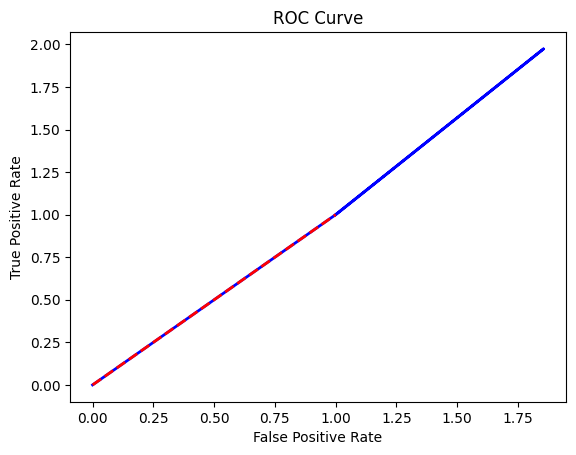

ROC-AUC: 0.5

LDA:
Accuracy: 0.5474452554744526
Precision: 0.5474452554744526
Recall: 1.0
F1 Score: 0.7075471698113208


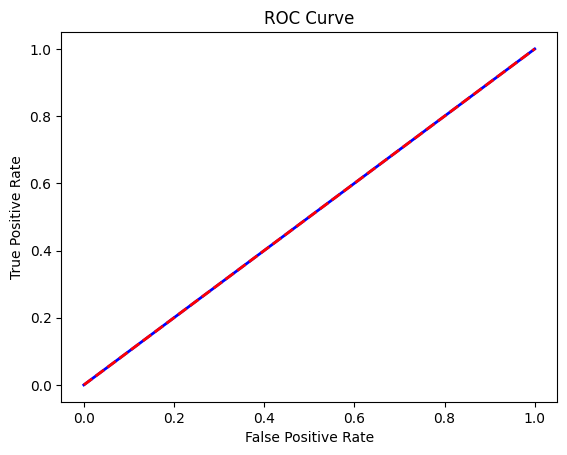

ROC-AUC: 0.5

Logistic Regression:
Accuracy: 0.7153284671532847
Precision: 0.75
Recall: 0.72
F1 Score: 0.7346938775510204


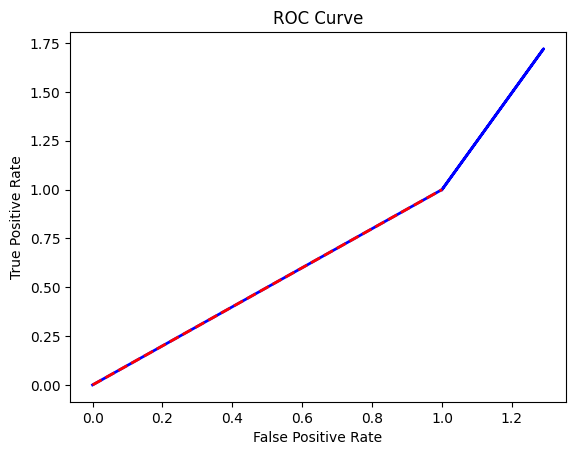

ROC-AUC: 0.5


In [46]:
# 4. Give the *accuracy, precision, recall, F1 Score,* and *ROC-AUC* on the test data for all three models. Discuss the results a bit–were there any major differences?

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * prec * rec / (prec + rec)


def calculate_roc_auc(y_true, y_scores):
    import matplotlib.pyplot as plt
    # Sort the scores and corresponding true values
    thresholds = np.sort(np.unique(y_scores))
    
    tpr_list = []
    fpr_list = []
    
    # Total positives and negatives
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    
    # Initialize the counts
    TP = 0  # True Positives
    FP = 0  # False Positives
    
    # Add an initial point (0, 0)
    tpr_list.append(0)
    fpr_list.append(0)
    
    # Loop over thresholds
    for threshold in thresholds:
        # Update TP and FP counts
        TP += np.sum((y_scores >= threshold) & (y_true == 1))
        FP += np.sum((y_scores >= threshold) & (y_true == 0))
        
        # Calculate TPR and FPR
        tpr = TP / P  # True Positive Rate
        fpr = FP / N  # False Positive Rate
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # Add the final point (1, 1)
    tpr_list.append(1)
    fpr_list.append(1)

    # Convert lists to arrays for easier handling
    tpr_list = np.array(tpr_list)
    fpr_list = np.array(fpr_list)

    # Calculate AUC using the trapezoidal rule
    auc = np.trapz(tpr_list, fpr_list)

    # Plot ROC Curve
    plt.plot(fpr_list, tpr_list, color='blue', lw=2)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return auc

print("SVM:")
print(f"Accuracy: {accuracy(y_test, svm_pred)}")
print(f"Precision: {precision(y_test, svm_pred)}")
print(f"Recall: {recall(y_test, svm_pred)}")
print(f"F1 Score: {f1_score(y_test, svm_pred)}")
print(f"ROC-AUC: {calculate_roc_auc(y_test, svm_pred)}")
print()
print("LDA:")
print(f"Accuracy: {accuracy(y_test, lda_pred)}")
print(f"Precision: {precision(y_test, lda_pred)}")
print(f"Recall: {recall(y_test, lda_pred)}")
print(f"F1 Score: {f1_score(y_test, lda_pred)}")
print(f"ROC-AUC: {calculate_roc_auc(y_test, lda_pred)}")
print()
print("Logistic Regression:")
print(f"Accuracy: {accuracy(y_test, log_reg_pred)}")
print(f"Precision: {precision(y_test, log_reg_pred)}")
print(f"Recall: {recall(y_test, log_reg_pred)}")
print(f"F1 Score: {f1_score(y_test, log_reg_pred)}")
print(f"ROC-AUC: {calculate_roc_auc(y_test, log_reg_pred)}")


Discussion of results.

## Section C

In the following questions, consider three model types for classification Logistic Regression, LDA, and SVC.

1. Consider the setup of the model and loss function that is used to justify the choice of linear classifier. Which of the three models has the strongest (i.e. most narrow/specific) assumptions? Which of the models requires the least strong assumptions? Explain your answer.

2. Of the three models, which ones require complex computation “tricks” like Gradient Descent? Which ones have a closed-form solution?

3. Which of the models would you expect to perform well in very high dimensional and/or linearly dependent data? Which would you expect to perform poorly? Why?

4. Suggest an approach (i.e., state a loss function or describe a procedure) to handle high dimensional data in each of the three model.

5. Which model would you do you prefer for the heart risk classification problem? Why? Why do you think that model lent itself well to this particular data?